# CKME Simple Recommender System

Using a weighted average, calculated using the movie rating average, all movie rating average, rating count, and total ratings, a list of top movies for the entire audience was created. Movies with less than 10 ratings were not included in the analysis to remove bias. 

In [3]:
import pandas as pd
import numpy as np

## Data Load and Cleaning

Movies, ratings and tags dataframes were loaded. Movies and ratings were merged and used in this analysis

In [4]:
movies = pd.read_csv('/Users/connorranson/Downloads/movies.csv')

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings = pd.read_csv('/Users/connorranson/Downloads/ratings.csv')

In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
tags = pd.read_csv('/Users/connorranson/Downloads/tags.csv')

In [9]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [10]:
movie_ratings = pd.merge(movies, ratings, on = 'movieId')

In [117]:
movie_ratings

,movieId,title,genres,userId,rating,Number of Ratings,Average Rating,rating total
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,215,3.92093,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,215,3.92093,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,215,3.92093,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,215,3.92093,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,215,3.92093,215
...,...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1,4.00000,1
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1,3.50000,1
100833,193585,Flint (2017),Drama,184,3.5,1,3.50000,1
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1,3.50000,1


In [12]:
movie_ratings.shape

(100836, 6)

In [13]:
movie_ratings = movie_ratings.drop(columns = "timestamp")

In [14]:
movie_ratings.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [15]:
movie_ratings['Number of Ratings']=movie_ratings.groupby('movieId')['movieId'].transform('count')

New variable was created to count the number of ratings each movie received

In [16]:
movie_ratings.head()

,movieId,title,genres,userId,rating,Number of Ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,215


In [17]:
movie_ratings.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [18]:
Rating_total = pd.DataFrame(movie_ratings.groupby('title')['rating'].mean())
Rating_total['rating total'] = pd.DataFrame(movie_ratings.groupby('title')['rating'].count())
Rating_total.head()

,rating,rating total
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [19]:
movie_ratings = pd.merge(movie_ratings, Rating_total, on = 'title')
movie_ratings = movie_ratings.rename(columns={'rating_x':'rating', 'rating_y': 'Average Rating'})
movie_ratings.head()

,movieId,title,genres,userId,rating,Number of Ratings,Average Rating,rating total
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,215,3.92093,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,215,3.92093,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,215,3.92093,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,215,3.92093,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,215,3.92093,215


New dataframe was created to store the new variable 'rating', which is the mean of all ratings given for each movie, and the 'rating total' which is the number of times that movie was rated.

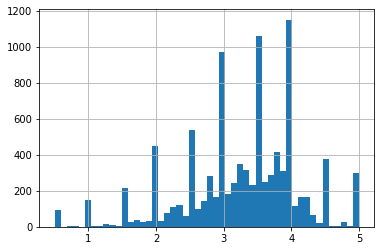

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
Rating_total['rating'].hist(bins=50)

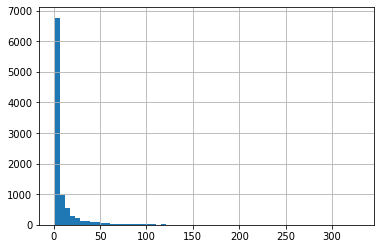

In [22]:
Rating_total['rating total'].hist(bins=60)

In [23]:
Rating_10 = Rating_total[Rating_total['rating total'] >= 10].copy()
print(Rating_10.shape)
m=len(Rating_10)
Rating_10 
#Only using movies with 10+ ratings

(2269, 2)


,rating,rating total
title,,
"'burbs, The (1989)",3.176471,17
(500) Days of Summer (2009),3.666667,42
10 Cloverfield Lane (2016),3.678571,14
10 Things I Hate About You (1999),3.527778,54
"10,000 BC (2008)",2.705882,17
...,...,...
Zoolander (2001),3.509259,54
Zootopia (2016),3.890625,32
eXistenZ (1999),3.863636,22


In [24]:
c=Rating_10['rating'].mean()
def weighted_rating(x, m=m, c=c):
    v = x['rating total']
    z = x['rating']
    return (v/(v+m) * z) + (m/(m+v) * c) 

A Weighted Average function was created to account for movies with more ratings than others. This was done on a new dataframe which only included movies with 10+ ratings

In [25]:
Rating_10['Score'] = Rating_10.apply(weighted_rating, axis = 1)

In [26]:
Rating_10 = Rating_10.sort_values(by='Score', ascending=False)

In [27]:
Rating_10.head(25)

,rating,rating total,Score
title,,,
"Shawshank Redemption, The (1994)",4.429022,317,3.554265
Forrest Gump (1994),4.164134,329,3.524761
Pulp Fiction (1994),4.197068,307,3.523225
"Matrix, The (1999)",4.192446,278,3.515048
"Silence of the Lambs, The (1991)",4.161290,279,3.511903
Star Wars: Episode IV - A New Hope (1977),4.231076,251,3.511638
Fight Club (1999),4.272936,218,3.505761
Schindler's List (1993),4.225000,220,3.502141
"Godfather, The (1972)",4.289062,192,3.498914


In [151]:
movie_genre = movie_ratings.copy()
movie_genre.head()

,movieId,title,genres,userId,rating,Number of Ratings,Average Rating,rating total
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,215,3.92093,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,215,3.92093,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,215,3.92093,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,215,3.92093,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,215,3.92093,215


In [152]:
movie_genre.drop_duplicates(subset = 'title', keep = 'first', inplace = True)

In [156]:
movie_genre = movie_genre.drop(columns = ['userId', 'rating', 'rating total'])

In [157]:
movie_genre.head()

,movieId,title,genres,Number of Ratings,Average Rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
215,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
325,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
377,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
384,5,Father of the Bride Part II (1995),Comedy,49,3.071429


In [159]:
movie_genre['year'] = movie_genre['title'].apply(lambda x: str(x).split(' ')[-1] if x != np.nan else np.nan)

In [160]:
movie_genre['year'] = movie_genre.year.replace('\(|\)', '', regex=True)

In [162]:
movie_genre.head()

,movieId,title,genres,Number of Ratings,Average Rating,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,1995
215,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,1995
325,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,1995
377,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143,1995
384,5,Father of the Bride Part II (1995),Comedy,49,3.071429,1995


In [163]:
def convert_int(x):
    try:
        return int(x)
    except:
        return 0

movie_genre['year'] = movie_genre['year'].apply(convert_int)
movie_genre.dtypes

movieId                int64
title                 object
genres                object
Number of Ratings      int64
Average Rating       float64
year                   int64
dtype: object

In [164]:
movie_genre['genres'] = movie_genre['genres'].str.replace('|',', ')
movie_genre.iloc[0]['genres']

'Adventure, Animation, Children, Comedy, Fantasy'

In [165]:
from ast import literal_eval

#Define a stringified list and output its type
a = "[1,2,3]"
print(type(a))

#Apply literal_eval and output type
b = literal_eval(a)
print(type(b))

<class 'str'>
<class 'list'>


In [168]:
#Convert all NaN into stringified empty lists
movie_genre['genres'] = movie_genre['genres'].fillna('[]')

movie_genre['genres'] = movie_genre['genres'].astype(str)

movie_genre

,movieId,title,genres,Number of Ratings,Average Rating,year
0,1,Toy Story (1995),"Adventure, Animation, Children, Comedy, Fantasy",215,3.920930,1995
215,2,Jumanji (1995),"Adventure, Children, Fantasy",110,3.431818,1995
325,3,Grumpier Old Men (1995),"Comedy, Romance",52,3.259615,1995
377,4,Waiting to Exhale (1995),"Comedy, Drama, Romance",7,2.357143,1995
384,5,Father of the Bride Part II (1995),Comedy,49,3.071429,1995
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),"Action, Animation, Comedy, Fantasy",1,4.000000,2017
100832,193583,No Game No Life: Zero (2017),"Animation, Comedy, Fantasy",1,3.500000,2017
100833,193585,Flint (2017),Drama,1,3.500000,2017
100834,193587,Bungo Stray Dogs: Dead Apple (2018),"Action, Animation",1,3.500000,2018


In [169]:
gen_df = (movie_genre.set_index(['movieId','title', 'Average Rating', 'Number of Ratings', 'year'])
   .apply(lambda x: x.str.split(',').explode())
   .reset_index())

In [170]:
gen_df.head()
gen_df.dtypes
gen_df = gen_df[gen_df['Number of Ratings'] >= 10]

In [171]:
gen_df.shape

(6107, 6)

In [172]:
def build_chart(gen_df, percentile=0.8):
    #Ask for preferred genres
    print("Input preferred genre")
    genre = input()
    
    #Ask for lower limit of timeline
    print("Input earliest year")
    low_year = int(input())
    
    #Ask for upper limit of timeline
    print("Input latest year")
    high_year = int(input())
    
    #Define a new movies variable to store the preferred movies. Copy the contents of gen_df to movies
    movies = gen_df.copy()
    
    #Filter based on the condition
    movies = movies[(movies['genres'] == genre) & 
                    (movies['year'] >= low_year) & 
                    (movies['year'] <= high_year)]
    
    #Compute the values of C and m for the filtered movies
    C = movies['Average Rating'].mean()
    m = movies['Number of Ratings'].quantile(percentile)
    
    #Only consider movies that have higher than m votes. Save this in a new dataframe q_movies
    q_movies = movies.copy().loc[movies['Number of Ratings'] >= m]
    
    #Calculate score using the IMDB formula
    q_movies['score'] = q_movies.apply(lambda x: (x['Number of Ratings']/(x['Number of Ratings']+m) * x['Average Rating']) 
                                       + (m/(m+x['Number of Ratings']) * C)
                                       ,axis=1)

    #Sort movies in descending order of their scores
    q_movies = q_movies.sort_values('score', ascending=False)
    
    return q_movies

In [182]:
build_chart(gen_df).head(10)

Input preferred genre
Action
Input earliest year
1990
Input latest year
2008


,movieId,title,Average Rating,Number of Ratings,year,genres,score
4914,2959,Fight Club (1999),4.272936,218,1999,Action,4.028950
4299,2571,"Matrix, The (1999)",4.192446,278,1999,Action,4.006340
15003,58559,"Dark Knight, The (2008)",4.238255,149,2008,Action,3.925749
3315,2028,Saving Private Ryan (1998),4.146277,188,1998,Action,3.905510
10376,7153,"Lord of the Rings: The Return of the King, The...",4.118919,185,2003,Action,3.882302
222,110,Braveheart (1995),4.031646,237,1995,Action,3.854481
1088,589,Terminator 2: Judgment Day (1991),3.970982,224,1991,Action,3.799339
545,293,Léon: The Professional (a.k.a. The Professiona...,4.018797,133,1994,Action,3.752381
5825,3578,Gladiator (2000),3.938235,170,2000,Action,3.735993
9943,6874,Kill Bill: Vol. 1 (2003),3.961832,131,2003,Action,3.711422
